In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import math
import cv2
from time import time

In [2]:
input_dir = "data/images"

input_shape = (320,320)

seed = 2802
test_size = 0.2
batch_size = 32
epochs=300

In [3]:
data = pd.read_csv('results/results - copia.csv')
data['sensivity'] = data['tp'] /(data['tp']+data['fn'])
data['specificity'] = data['tn'] /(data['tn']+data['fp'])

data['val_sensivity'] = data['val_tp'] /(data['val_tp']+data['val_fn'])
data['val_specificity'] = data['val_tn'] /(data['val_tn']+data['val_fp'])

data_filter = data[(data['step']==epochs)]

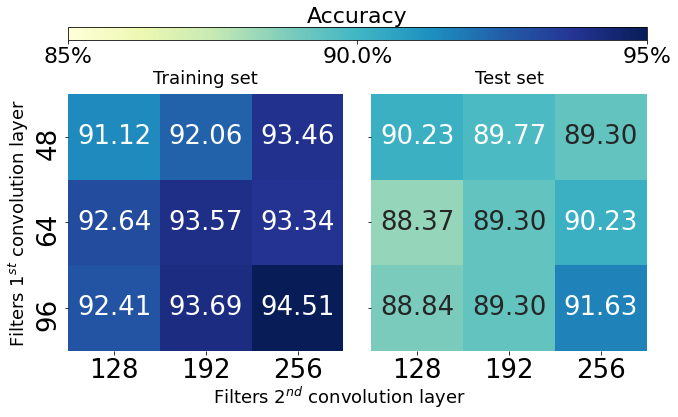

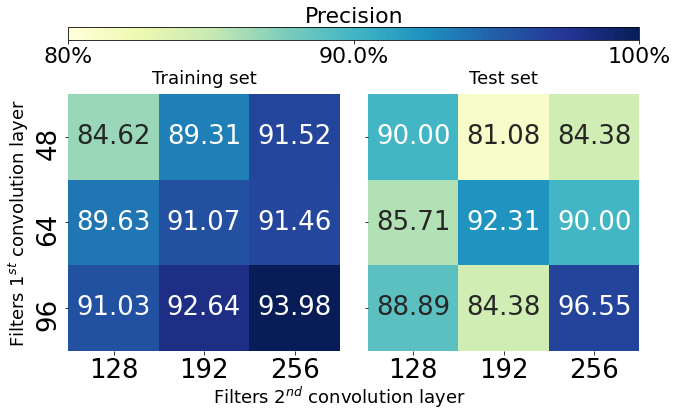

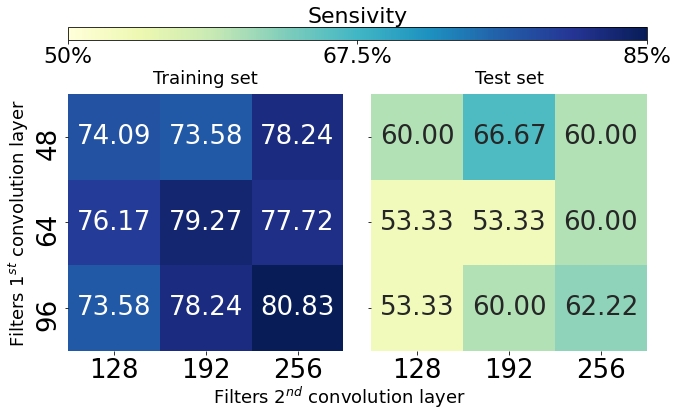

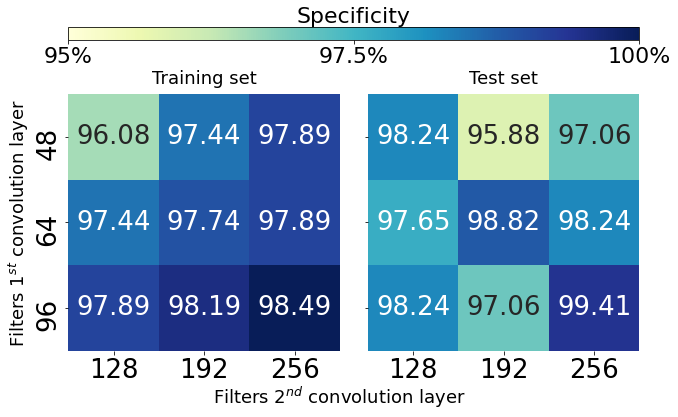

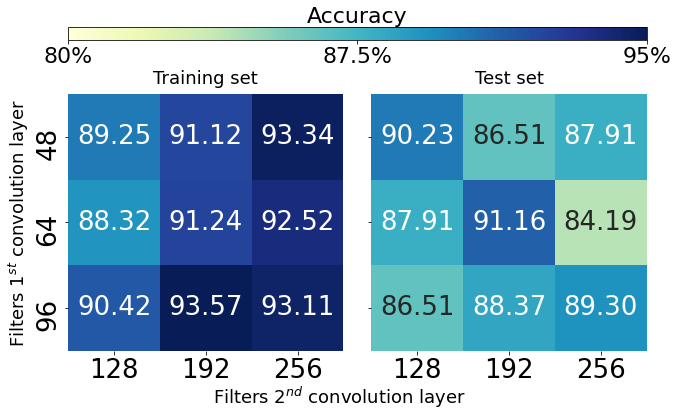

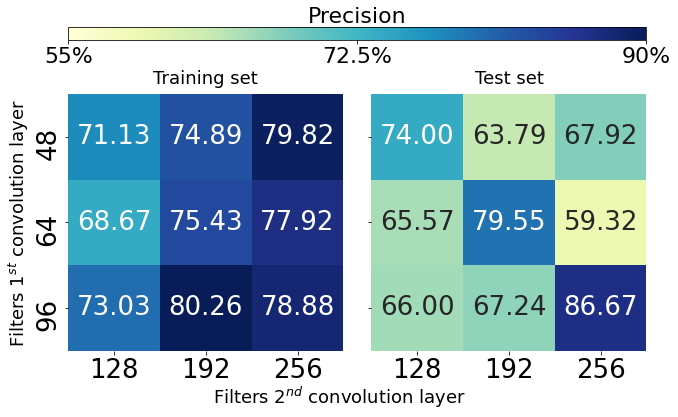

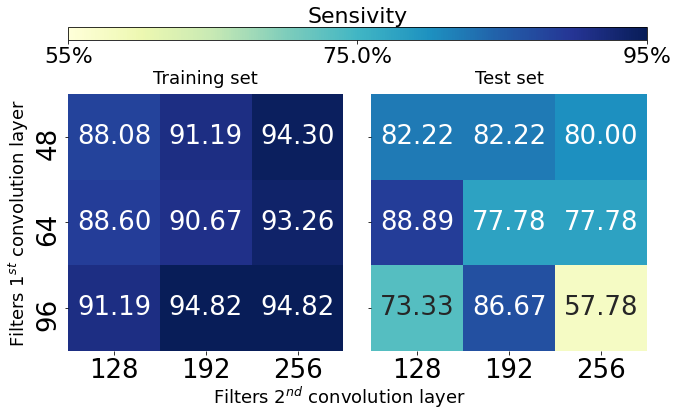

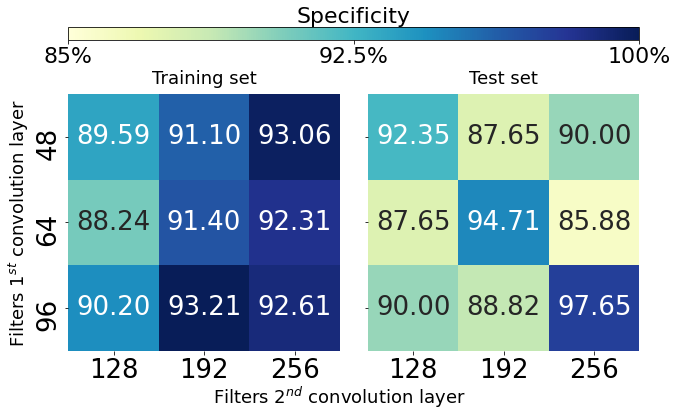

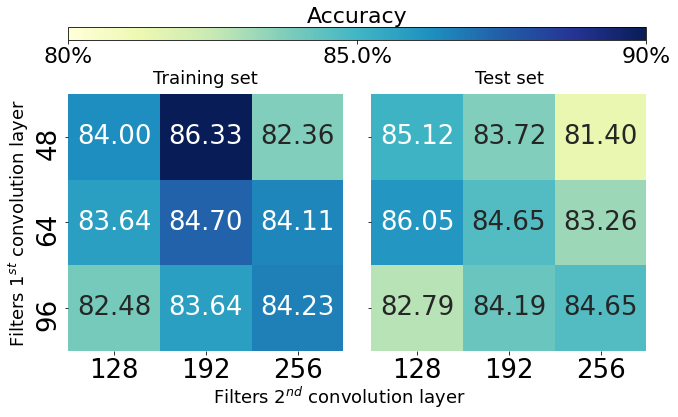

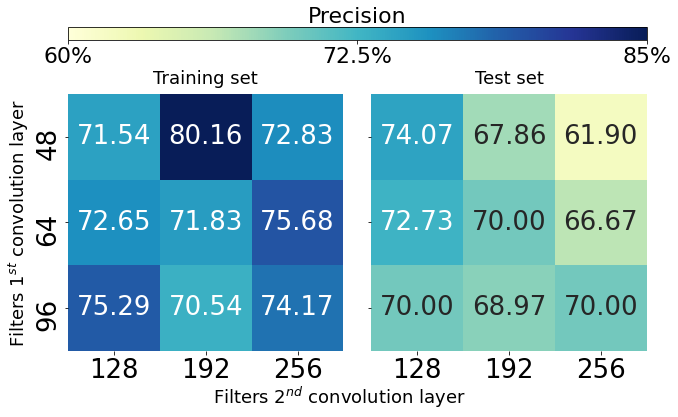

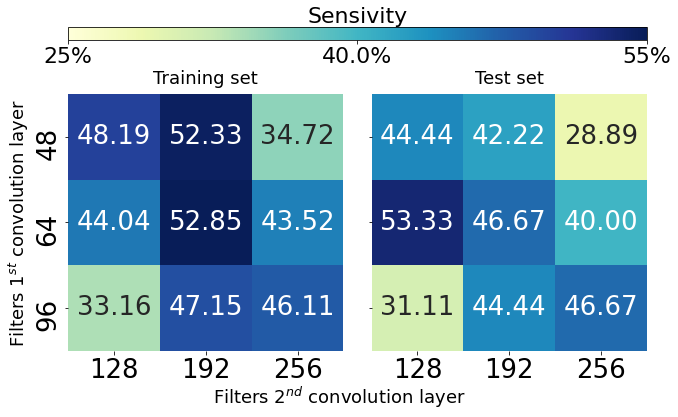

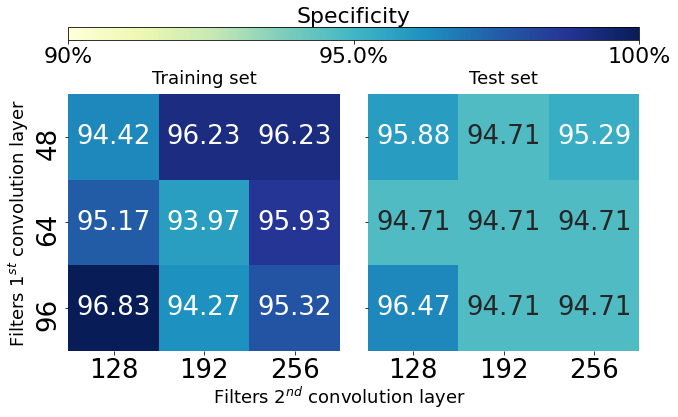

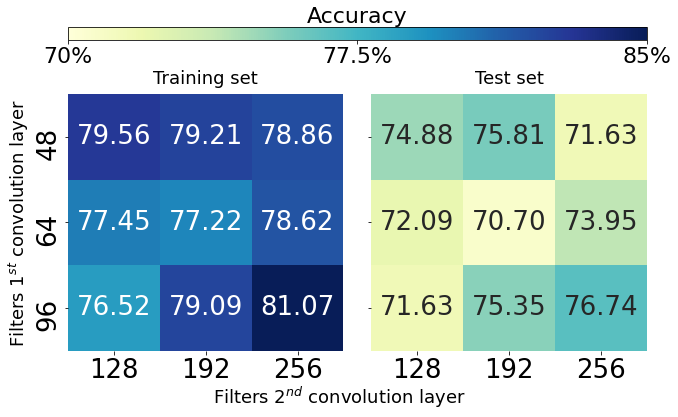

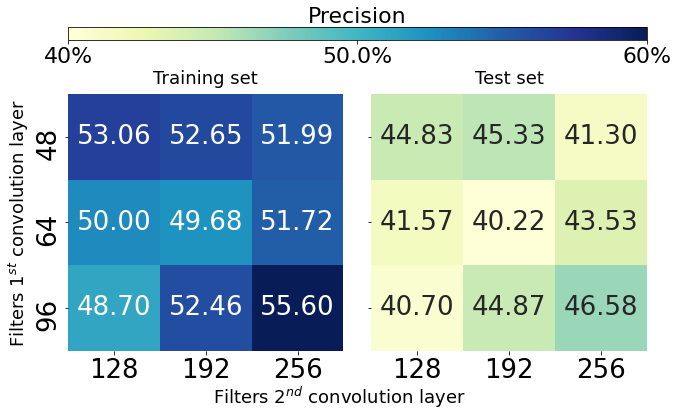

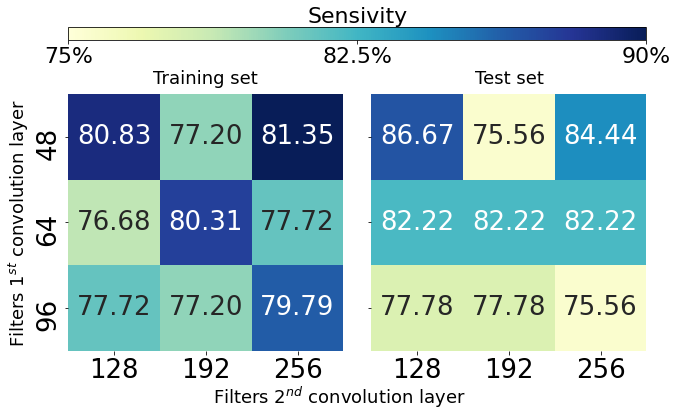

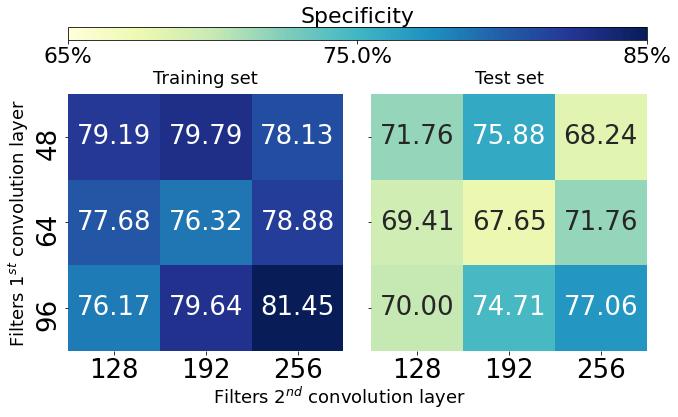

In [4]:
metrics = ['accuracy', 'precision', 'sensivity', 'specificity']

for opt in ['fixed','gradual']:
    for dataw in ['normal', 'weighted']:
        for metric in metrics:
            df = data_filter[(data_filter['optimizer']==opt) & (data_filter['data']==dataw)]
            
            vmin = math.floor((min(df[metric].min(), df["val_"+metric].min())*100) / 5) * 5
            vmax = math.ceil((max(df[metric].max(), df["val_"+metric].max())*100) / 5) * 5
            ticks = [vmin, (vmin+vmax)/2, vmax]
            tick_label = [str(round(v,1))+'%' for v in ticks]
            
            hmap = df.pivot(index="filter1", columns="filter2", values=metric)
            hmap_val = df.pivot(index="filter1", columns="filter2", values="val_"+metric)

            plt.rcParams.update({'font.size': 26})
            fig, axs = plt.subplots(ncols=2, nrows=2, gridspec_kw=dict(height_ratios=[0.2, 4]), figsize=(10,6), sharey=True)
            
            gs = axs[0, 0].get_gridspec()
            # remove the underlying axes
            for ax in axs[0, 0:]:
                ax.remove()
            axbig = fig.add_subplot(gs[0, 0:])

            sns.heatmap(hmap*100, annot=True, cbar=False, ax=axs[1][0], cmap="YlGnBu", fmt=".2f", vmin=vmin) #vmin=values[0]
            axs[1][0].set_xlabel('')
            axs[1][0].set_ylabel(r'Filters $1^{st}$ convolution layer', fontsize=18)
            axs[1][0].set_title('Training set', pad=10, fontsize=18)
            #axs[0][0].set_xticks([])
            #axs[0][0].set_xlabel('')

            ax2 = sns.heatmap(hmap_val*100, annot=True, cbar=False, ax=axs[1][1], cmap="YlGnBu", fmt=".2f", vmin=vmin, vmax= vmax)#vmin=values[0], vmax=values[1]
            #axs[1].set_ylabel('Filters 1st convolution layer', fontsize=22)
            axs[1][1].set_xlabel('')
            axs[1][1].set_ylabel('')
            axs[1][1].set_title('Test set', pad=10, fontsize=18)

            fig.text(0.5, 0.02, r'Filters $2^{nd}$ convolution layer', ha='center', fontsize=18)
            #fig.suptitle(metric.capitalize())
            
            cbar = fig.colorbar(axs[1][1].collections[0], cax=axbig, ticks=ticks, orientation='horizontal')
            cbar.ax.set_xticklabels(tick_label) 
            cbar.ax.tick_params(labelsize=22)
            cbar.set_label(metric.capitalize(), labelpad=-60, y=0.5, fontsize=22)
            
            plt.tight_layout(h_pad=0.1)
            plt.savefig('results/img_matrix_'+opt+'_'+dataw+'_'+metric+'.png', dpi=600)
            plt.show()

Optimizer fixed 	Data normal


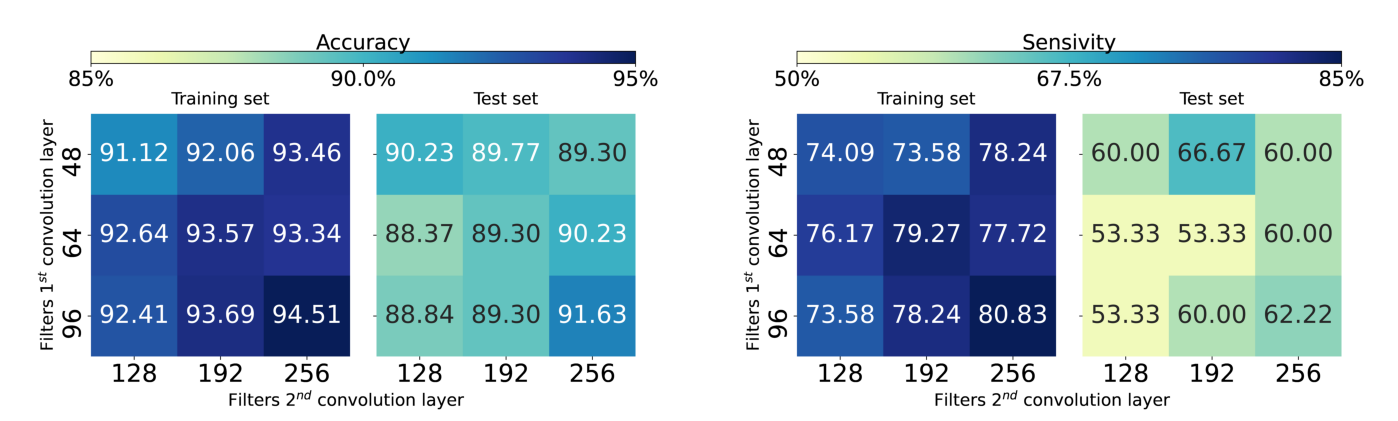

Optimizer fixed 	Data weighted


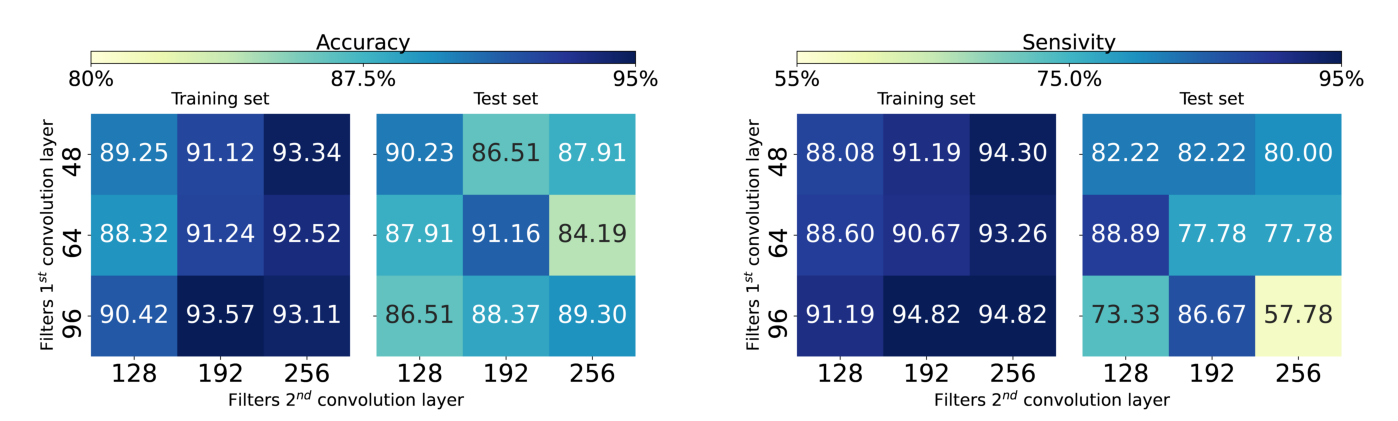

Optimizer gradual 	Data normal


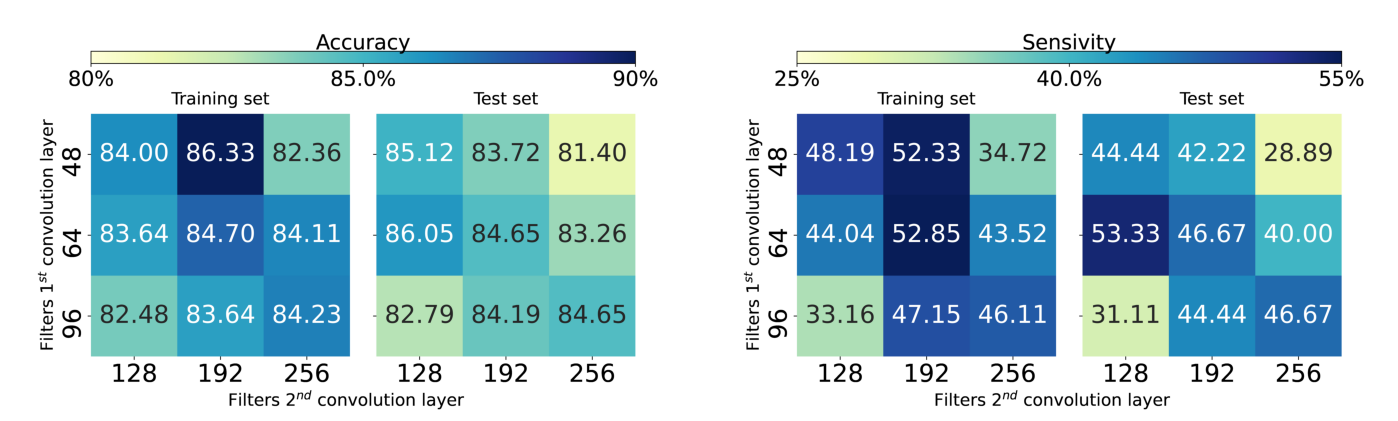

Optimizer gradual 	Data weighted


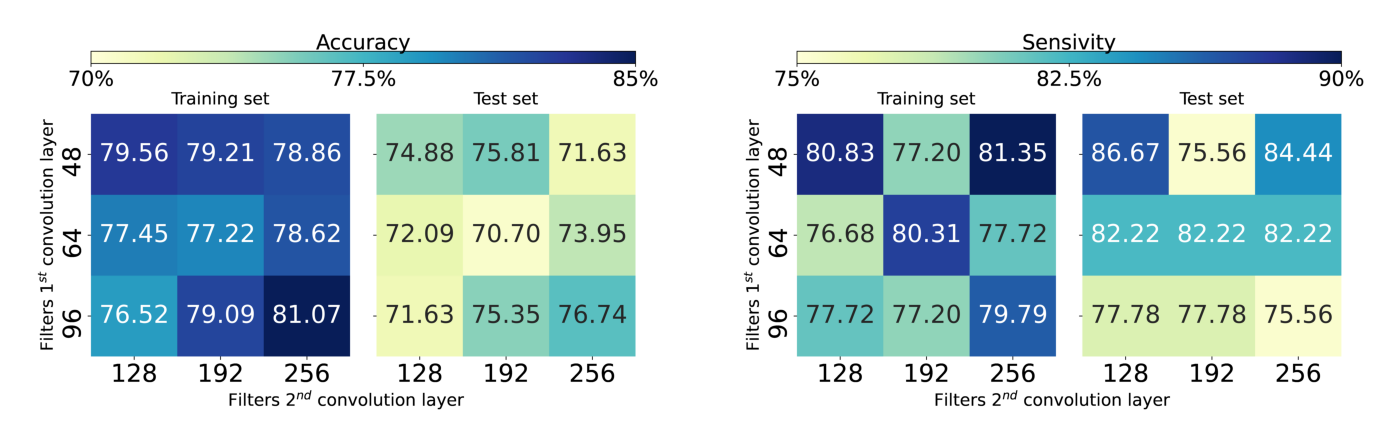

In [5]:
metrics = ['accuracy', 'sensivity']

for opt in ['fixed','gradual']:
    for dataw in ['normal', 'weighted']:
        print('Optimizer',opt,'\tData',dataw)
        fig, axs = plt.subplots(ncols=2, figsize=(20,7))
        for metric,i in zip(metrics,range(len(metrics))):
            img = cv2.cvtColor(cv2.imread('results/img_matrix_'+opt+'_'+dataw+'_'+metric+'.png'), cv2.COLOR_BGR2RGB)
            axs[i].imshow(img)
            axs[i].axis('off')
        
        plt.tight_layout()
        plt.show()

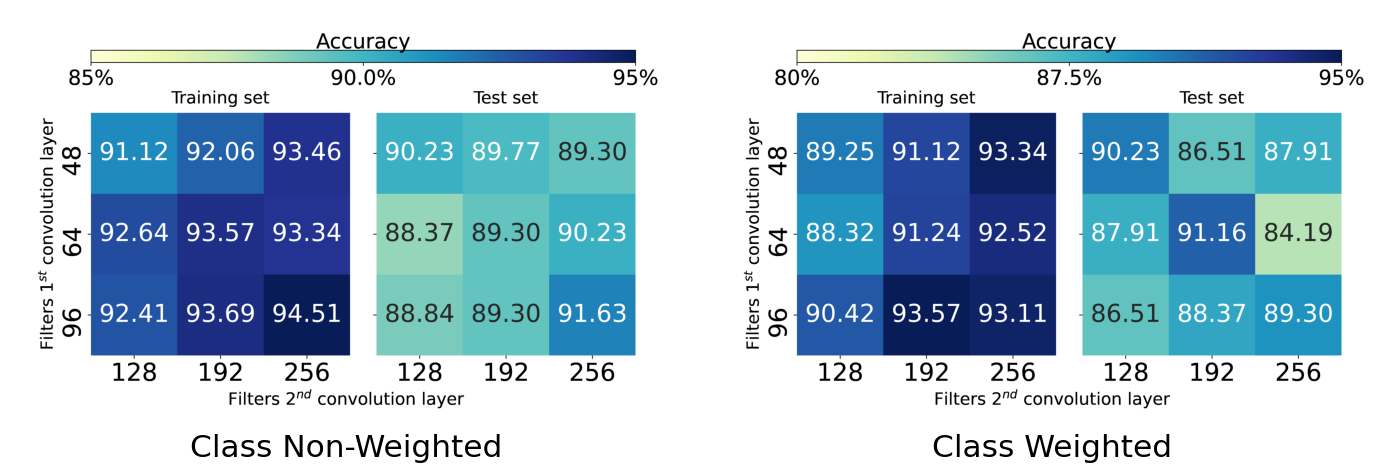

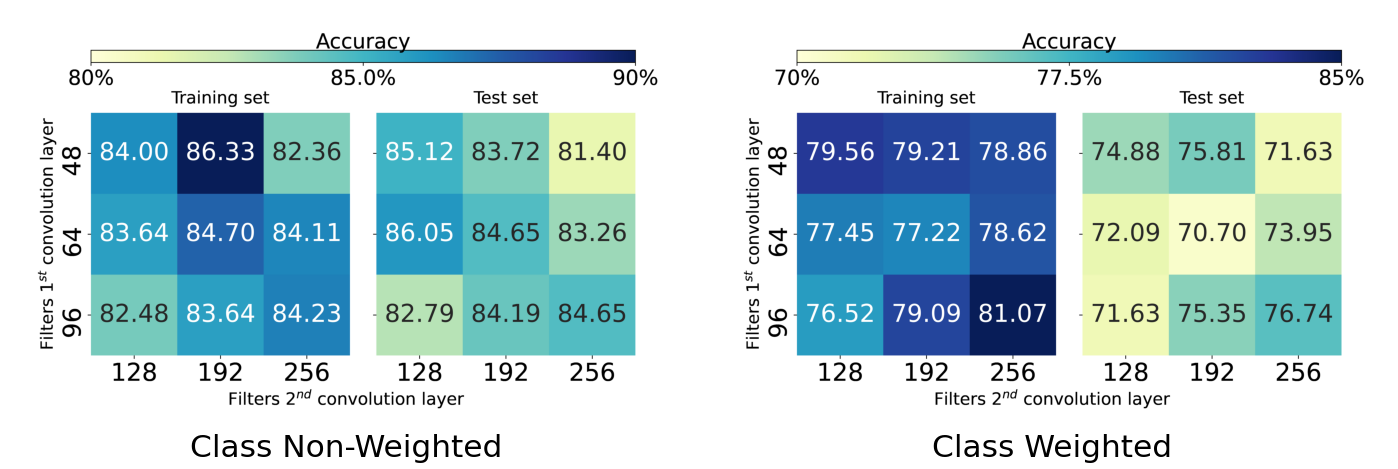

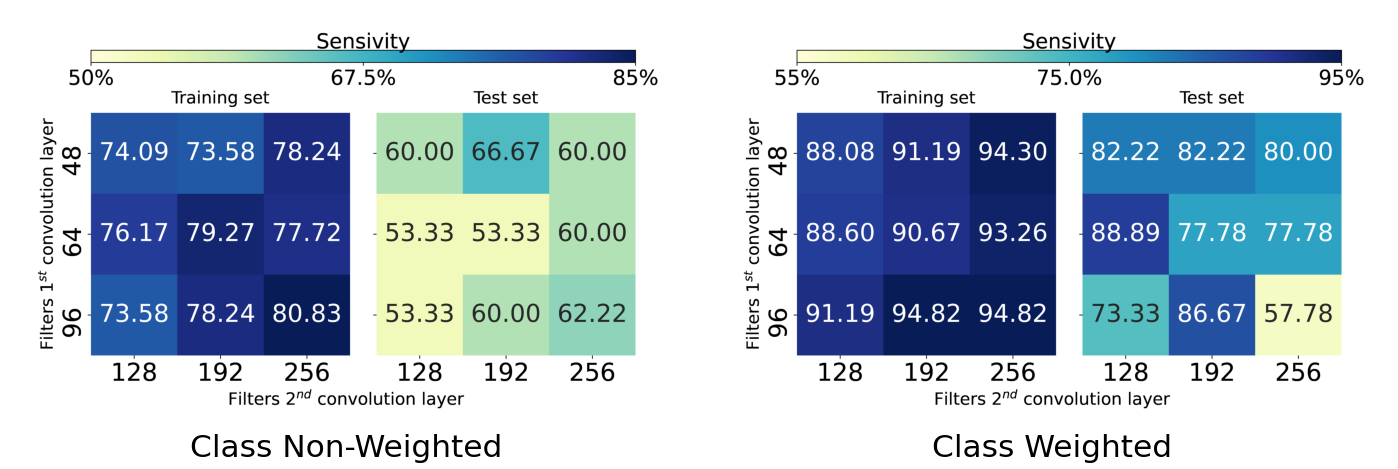

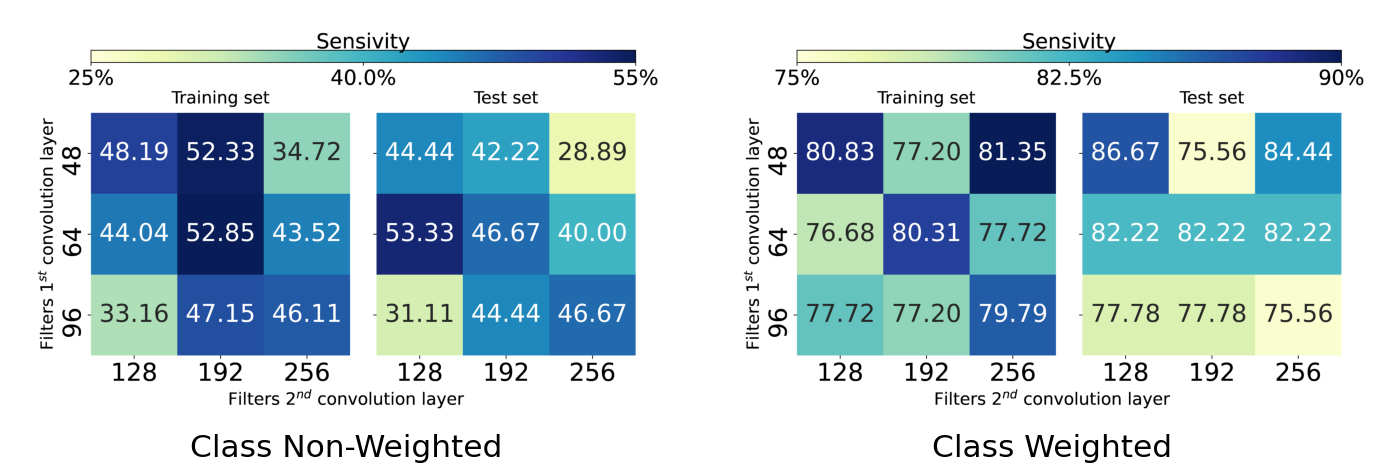

In [14]:
metrics = ['accuracy', 'sensivity']

for metric in metrics:    
    for opt, row in zip(['fixed','gradual'], range(2)):
        fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
        for dataw, col in zip(['normal', 'weighted'], range(2)):
            img = cv2.cvtColor(cv2.imread('results/img_matrix_'+opt+'_'+dataw+'_'+metric+'.png'), cv2.COLOR_BGR2RGB)
            axs[col].imshow(img)
            axs[col].axis('off')

        axs[1].set_title('Class Weighted',y=-0.12) 
        axs[0].set_title('Class Non-Weighted',y=-0.12) 
        #fig.suptitle('Class Non-Weighted', y = 0.06, x=0.25)

        #axs[0][0].set_title('Fixed',x=0,y=0.35, rotation='vertical')
        #axs[1][0].set_title('Gradual',x=0,y=0.3, rotation='vertical')

        plt.tight_layout()
        plt.savefig('results/img_compare_'+opt+'_'+metric+'.png', dpi=600)
        plt.show()

In [7]:
df = pd.read_csv('data/dataset_train_test.csv') 
df['piece'] = df['part'].apply(lambda x: int(x[1:]))
df['path'] = input_dir+'/'+df['image_name']+'.jpg'
df['category'] = np.where(df['class']==1, 0, np.where(df['class']==2, 0, 1)) #class_mode binary 0: NOBURR 1 BURR

df.head()

,Unnamed: 0,image_name,part,section,min_height,max_height,diff_height,piece_position,class,image_id,set,piece,path,category
0,0,P01_001_0,P01,0,181,200,19,Down,2,1,Train,1,data/images/P01_001_0.jpg,0
1,1,P01_001_1,P01,1,198,208,10,Down,1,1,Train,1,data/images/P01_001_1.jpg,0
2,2,P01_001_2,P01,2,204,214,10,Down,1,1,Train,1,data/images/P01_001_2.jpg,0
3,3,P01_001_3,P01,3,200,212,12,Down,1,1,Train,1,data/images/P01_001_3.jpg,0
4,4,P01_002_0,P01,0,232,238,6,Down,1,2,Train,1,data/images/P01_002_0.jpg,0


In [8]:
datagen_normal = ImageDataGenerator(rescale=1./255)
validation_generator_normal = datagen_normal.flow_from_dataframe(
    df[df['set']=='Test'],
    x_col='path', 
    y_col='category', 
    target_size=input_shape, 
    batch_size=batch_size,
    class_mode="raw",
    seed=seed,
    shuffle=True,)

Found 215 validated image filenames.


In [9]:
data_info = pd.read_csv('results/info.csv')
data_info['eval_time'] =0.0

images = validation_generator_normal.next()
image = images[0][0,:,:,:]
img_tensor = np.expand_dims(image, axis=0)

In [10]:
for opt, opt_name in zip(['fixed','gradual'],['adam_0.000001','adam_exponential']):
    for dataw in ['normal', 'weighted']:
        df_filter = data_info[(data_info['optimizer']==opt)&(data_info['data']==dataw)]

        for index, row in data_info.iterrows():
            folder = 'results/small_alexnet_'+opt_name+'_'+dataw+'_f_'+str(row.filter1)+'_'+str(row.filter2)    
            model = tf.keras.models.load_model(folder)

            times = []
            for i in range(15):
                start = time()
                model.predict(img_tensor, verbose=False)
                evaluation_time = (time()-start)
                times.append(evaluation_time)
            data_info.at[index, 'eval_time'] = np.median(np.array(times))
            print(folder, evaluation_time)
data_info.to_csv('results/info.csv', index=False)

results/small_alexnet_adam_0.000001_normal_f_48_128 0.03989243507385254
results/small_alexnet_adam_0.000001_normal_f_48_192 0.04522514343261719
results/small_alexnet_adam_0.000001_normal_f_48_256 0.03963661193847656
results/small_alexnet_adam_0.000001_normal_f_64_128 0.03881430625915527
results/small_alexnet_adam_0.000001_normal_f_64_192 0.04126167297363281
results/small_alexnet_adam_0.000001_normal_f_64_256 0.03847646713256836
results/small_alexnet_adam_0.000001_normal_f_96_128 0.037412166595458984
results/small_alexnet_adam_0.000001_normal_f_96_192 0.04437732696533203
results/small_alexnet_adam_0.000001_normal_f_96_256 0.04130125045776367
results/small_alexnet_adam_0.000001_normal_f_48_128 0.0389103889465332
results/small_alexnet_adam_0.000001_normal_f_48_192 0.046472787857055664
results/small_alexnet_adam_0.000001_normal_f_48_256 0.042954444885253906
results/small_alexnet_adam_0.000001_normal_f_64_128 0.05924797058105469
results/small_alexnet_adam_0.000001_normal_f_64_192 0.04815721

results/small_alexnet_adam_exponential_weighted_f_64_128 0.0571751594543457
results/small_alexnet_adam_exponential_weighted_f_64_192 0.046475887298583984
results/small_alexnet_adam_exponential_weighted_f_64_256 0.04859161376953125
results/small_alexnet_adam_exponential_weighted_f_96_128 0.04963374137878418
results/small_alexnet_adam_exponential_weighted_f_96_192 0.044722795486450195
results/small_alexnet_adam_exponential_weighted_f_96_256 0.03959846496582031
results/small_alexnet_adam_exponential_weighted_f_48_128 0.0371248722076416
results/small_alexnet_adam_exponential_weighted_f_48_192 0.04587578773498535
results/small_alexnet_adam_exponential_weighted_f_48_256 0.04829740524291992
results/small_alexnet_adam_exponential_weighted_f_64_128 0.058226585388183594
results/small_alexnet_adam_exponential_weighted_f_64_192 0.04960346221923828
results/small_alexnet_adam_exponential_weighted_f_64_256 0.0495295524597168
results/small_alexnet_adam_exponential_weighted_f_96_128 0.04886841773986816

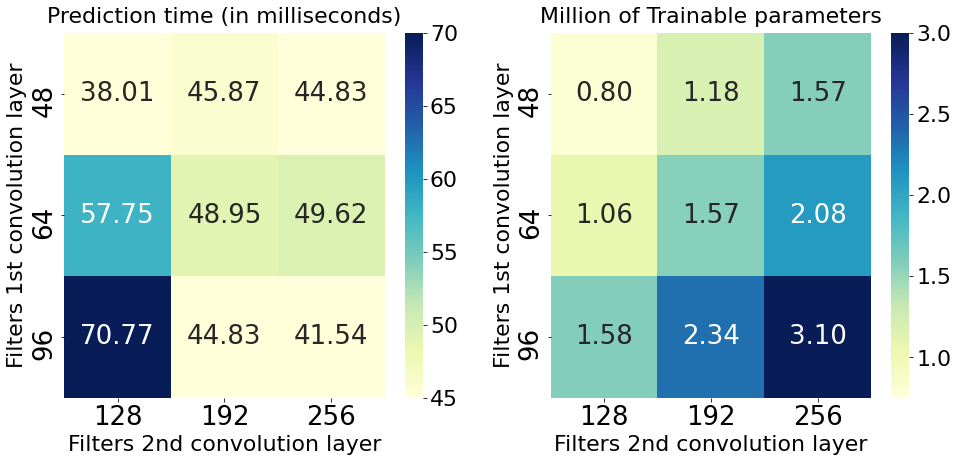

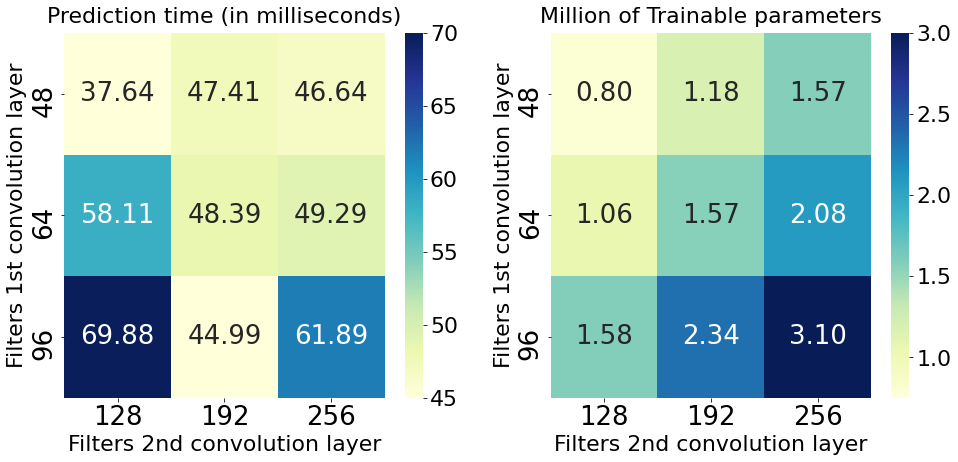

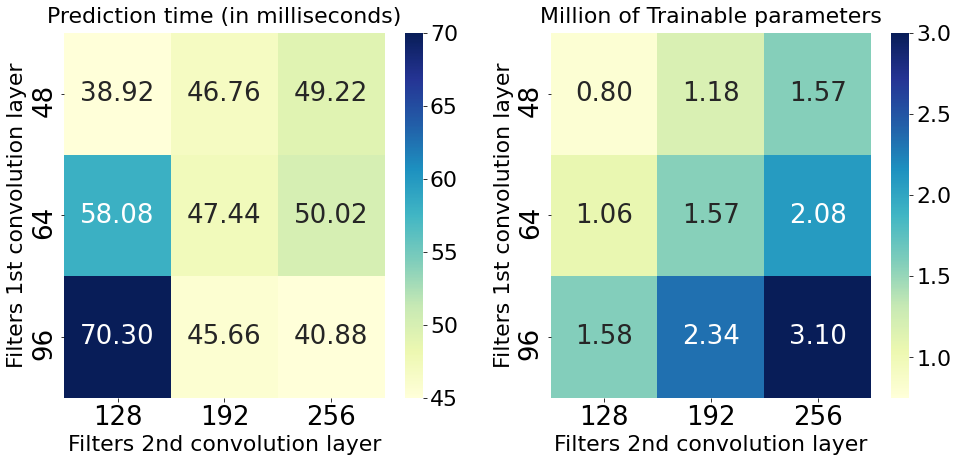

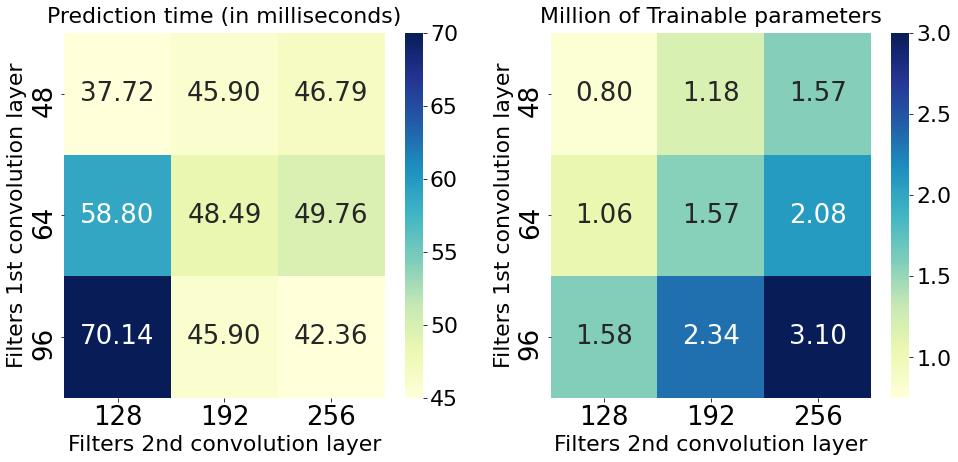

In [13]:
for opt, opt_name in zip(['fixed','gradual'],['adam_0.000001','adam_exponential']):
    for dataw in ['normal', 'weighted']:
        df_filter = data_info[(data_info['optimizer']==opt)&(data_info['data']==dataw)]

        #data_info = pd.read_csv('results/info.csv')
        hmap_time = df_filter.pivot(index="filter1", columns="filter2", values="eval_time")*1000 #seconds
        hmap_params = df_filter.pivot(index="filter1", columns="filter2", values="train_parameters") #thousand of trainable parameters
        
        fig, axs = plt.subplots(ncols=2, figsize=(14,7))
        plt.rcParams.update({'font.size': 26})
        ax = sns.heatmap(hmap_time, annot=True, ax=axs[0], cmap="YlGnBu", fmt=".2f", vmin=45, vmax= 70)#, cbar_kws={'ticks': [14,16,18,20,22]})
        axs[0].set_ylabel('Filters 1st convolution layer', fontsize=22)
        axs[0].set_xlabel('Filters 2nd convolution layer', fontsize=22)
        axs[0].set_title('Prediction time (in milliseconds)', pad=10, fontsize=22)
        cax = ax.figure.axes[-1]
        cax.tick_params(labelsize=22)

        ax = sns.heatmap(hmap_params/1000000, annot=True, ax=axs[1], cmap="YlGnBu", fmt=".2f", vmin=0.75, vmax=3)
        axs[1].set_ylabel('Filters 1st convolution layer', fontsize=22)
        axs[1].set_xlabel('Filters 2nd convolution layer', fontsize=22)
        axs[1].set_title('Million of Trainable parameters', pad=10, fontsize=22)
        cax = ax.figure.axes[-1]
        cax.tick_params(labelsize=22)

        plt.tight_layout()
        plt.savefig('results/img_matrix_'+opt+'_'+dataw+'_computational.png', dpi=600)

        plt.show()

In [17]:
selected_data = data[(data['filter1']==48) & (data['filter2']==256) & (data['step']==epochs) & (data['optimizer']=='fixed') & (data['data']=='weighted')].reset_index()

def print_metrics(tp,fp,fn,tn):
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    print('Accuracy:',accuracy)
    precision = tp/(tp+fp)
    print('Precision:',precision)
    recall = tp/(tp+fn)
    print('Recall:',recall)
    error = (fp+fn)/(tp+fp+fn+tn)
    print('Error rate:',error)
    sensivity = tp/(tp+fn)
    print('Sensivity:',sensivity)
    specificity = tn/(tn+fp)
    print('Specificity:',specificity)
    f1_Score = (2*precision*recall)/(precision+recall)
    print('F1-score:',f1_Score)

print('TRAINING')
print_metrics(selected_data.loc[0]['tp'],selected_data.loc[0]['fp'],selected_data.loc[0]['fn'],selected_data.loc[0]['tn'])

print('\nTEST')
print_metrics(selected_data.loc[0]['val_tp'],selected_data.loc[0]['val_fp'],selected_data.loc[0]['val_fn'],selected_data.loc[0]['val_tn'])

TRAINING
Accuracy: 0.9334112149532711
Precision: 0.7982456140350878
Recall: 0.9430051813471503
Error rate: 0.06658878504672897
Sensivity: 0.9430051813471503
Specificity: 0.9306184012066365
F1-score: 0.8646080760095012

TEST
Accuracy: 0.8790697674418605
Precision: 0.6792452830188679
Recall: 0.8
Error rate: 0.12093023255813953
Sensivity: 0.8
Specificity: 0.9
F1-score: 0.7346938775510203
